C:\Users\Samira\Sumeyra\AppData\Local\Temp\ipykernel_18824\2661023008.py:44: RuntimeWarning: invalid value encountered in divide
  colors = plt.cm.plasma(distances / np.max(distances))
C:\Users\Samira\Sumeyra\AppData\Local\Temp\ipykernel_18824\2661023008.py:44: RuntimeWarning: invalid value encountered in divide
  colors = plt.cm.plasma(distances / np.max(distances))
MovieWriter ffmpeg unavailable; using Pillow instead.
C:\Users\Samira\Sumeyra\AppData\Local\Temp\ipykernel_18824\2661023008.py:44: RuntimeWarning: invalid value encountered in divide
  colors = plt.cm.plasma(distances / np.max(distances))
C:\Users\Samira\Sumeyra\AppData\Local\Temp\ipykernel_18824\2661023008.py:44: RuntimeWarning: invalid value encountered in divide
  colors = plt.cm.plasma(distances / np.max(distances))


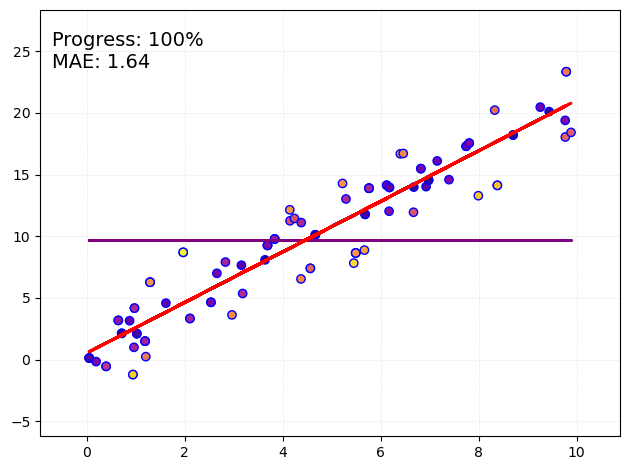

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

# Veri oluşturma
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X + np.random.randn(100, 1) * 2

# Dinamik veri yeniden örnekleme
X, y = resample(X, y, n_samples=100, random_state=0)

# Model
model = LinearRegression()

# Grafik hazırlama
fig, ax = plt.subplots()
scatter = ax.scatter(X, y, color='blue', zorder=5)
line, = ax.plot([], [], color='red', lw=2, zorder=10)
mean_line, = ax.plot([], [], color='purple', lw=2, linestyle='-.', zorder=6)
progress_text = ax.text(0.02, 0.95, 'Progress: 0%', transform=ax.transAxes, fontsize=14, verticalalignment='top')
error_text = ax.text(0.02, 0.90, '', transform=ax.transAxes, fontsize=14, verticalalignment='top')
ax.set_xlim(-1, 11)
ax.set_ylim(-10, 30)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)

# Animasyon fonksiyonu
def update(frame):
    # Modeli her yeni veriye göre eğit
    model.fit(X[:frame+1], y[:frame+1])
    y_pred = model.predict(X)
    
    # Çizgiyi güncelle
    line.set_data(X, y_pred)

    # Mean line güncelle
    mean_value = np.mean(y[:frame+1])
    mean_line.set_data(X, np.full_like(X, mean_value))

    # Verilerin rengini değiştirme
    distances = np.abs(y[:frame+1] - model.predict(X[:frame+1])).flatten()
    colors = plt.cm.plasma(distances / np.max(distances))
    scatter.set_facecolors(colors)

    # Progress text güncelleme
    progress_text.set_text(f'Progress: {int((frame + 1) / len(X) * 100)}%')

    # Error metric hesaplama ve gösterme
    error = np.mean(np.abs(y[:frame+1] - model.predict(X[:frame+1])))
    error_text.set_text(f'MAE: {error:.2f}')

    # Dinamik eksen limitlerini güncelleme
    ax.set_ylim(np.min(y) - 5, np.max(y) + 5)
    ax.set_xlim(np.min(X) - 1, np.max(X) + 1)
    
    return line, mean_line, progress_text, error_text

# Animasyon
ani = FuncAnimation(fig, update, frames=len(X), interval=50, blit=True)
plt.tight_layout()

# Kaydetme işlemi
ani.save('advanced_linear_regression_animation.gif', writer='ffmpeg', fps=45)
plt.show()